# Predicting House Sale Prices

## Introduction

I'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. Read more about why the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). Information about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

The goal of this project is to use the linear regression model to predict the sale price.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

%matplotlib inline
import seaborn as sns


pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('AmesHousing.tsv', delimiter='\t')
data.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

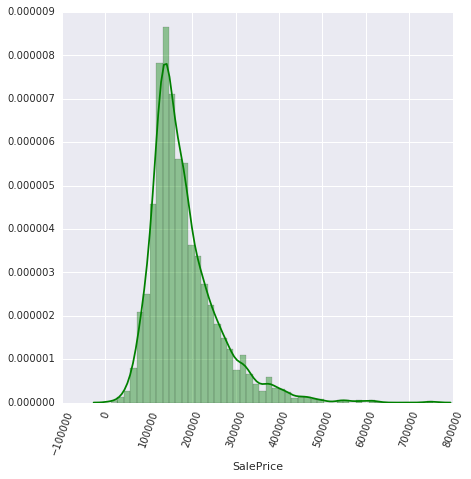

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
sns.distplot(data['SalePrice'], color='green')
plt.xticks(rotation=70)
plt.show()


In [5]:
# create a function which, for now, just returns the train data frame.
def transform_features(data):
    return data

In [6]:
#examine transform_features() function
train_data = transform_features(data)
train_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
#Create a function which, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
def select_features(data):
    columns = ['Gr Liv Area', 'SalePrice']
    return data[columns]

In [8]:
#examine select_features() function
two_columns_select = select_features(train_data)
two_columns_select.head()

,Gr Liv Area,SalePrice
0,1656,215000
1,896,105000
2,1329,172000
3,2110,244000
4,1629,189900


Let's create a function named train_and_test() that, for now:

- Selects the first 1460 rows from from data and assign to train.
- Selects the remaining rows from data and assign to test.
- Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from select_features()
- Tests the model on the test set and returns the RMSE value.


In [9]:
def train_and_test(data):
    
    train_test_index = round(len(data)/2)
    #select only numeric data
    train = data[:train_test_index].select_dtypes(include=['integer', 'float'])
    test = data[train_test_index:].select_dtypes(include=['integer', 'float'])
    
    features = train.columns.drop('SalePrice')
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    return rmse


In [10]:
#examine train_and_test() function
test_func_3 = train_and_test(two_columns_select)
test_func_3

57120.50729008638

## Feature Engineering  

Let's handle missing values:
    
1. For all columns:
 - Drop any with 5% or more missing values for now.
2. Text columns:
 - Drop any with 1 or more missing values for now.
3. Numerical columns:
 - For columns with missing values, fill in with the most common value in that column


In [11]:
#check the missing values
train_null_counts = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
train_null_counts

Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
Name: nans, dtype: int64

In [12]:
# 1. For all columns:
# Drop any with 5% or more missing values for now.

precentage_5 = len(data)*5/100

missing_values_5 = train_null_counts[(train_null_counts > precentage_5)].sort_values()

data = data.drop(missing_values_5.index, axis=1)


In [13]:
# 2.Text columns:
# Drop any with 1 or more missing values for now.

text_cols_mv = data.select_dtypes(include=['object']).isnull().sum()
drop_text_cols_mv = text_cols_mv[text_cols_mv > 0]

data = data.drop(drop_text_cols_mv.index, axis=1)


In [14]:
# 3. Numerical columns:
# For columns with missing values, fill in with the most common value in that column

mode_values = data.mode().iloc[0]
data = data.fillna(data.mode().iloc[0])


Let's create a new features that can better capture the information in some of the features. I will use features which have information about years.

In [15]:
data['Years Since Remod'] = data['Yr Sold'] - data['Year Remod/Add']  
data['Years Before Sale'] = data['Yr Sold'] - data['Year Built']  

In [16]:
# check 'Years Since Remod' column because it must be positive

data[data['Years Since Remod'] < 0]['Years Since Remod']

1702   -1
2180   -2
2181   -1
Name: Years Since Remod, dtype: int64

In [17]:
# check 'Years Before Sale' column because it must be positive

data[data['Years Before Sale'] < 0]['Years Before Sale']

2180   -1
Name: Years Before Sale, dtype: int64

In [18]:
#Let's drop negative values from new columns

data = data.drop(index = [1702, 2180, 2181])


In [19]:
# remove any columns that leak information about the sale and have useless information

columns_delete = ['Order', 'PID', 'Yr Sold', 'Mo Sold', 'Sale Condition', 'Sale Type', 'Year Built', 'Year Remod/Add']
data = data.drop(columns_delete, axis=1)


Let's transform transform_features() function

In [20]:
def transform_features(data):
    #drop columns with more than 5% missing values
    train_null_counts = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
    precentage_5 = len(data)*5/100
    missing_values_5 = train_null_counts[(train_null_counts > precentage_5)].sort_values()
    data = data.drop(missing_values_5.index, axis=1)

    #drop text columns with missing values
    text_cols_mv = data.select_dtypes(include=['object']).isnull().sum()
    drop_text_cols_mv = text_cols_mv[text_cols_mv > 0]
    data = data.drop(drop_text_cols_mv.index, axis=1)

    #fill null values of numerical columns with the most common value
    mode_values = data.mode().iloc[0]
    data = data.fillna(data.mode().iloc[0])

    #create new features
    data['Years Since Remod'] = data['Yr Sold'] - data['Year Remod/Add']  
    data['Years Before Sale'] = data['Yr Sold'] - data['Year Built'] 
    
    #drop negative values from new columns
    data = data.drop(index = [1702, 2180, 2181])
    
    #drop columns that leak information about the sale and have useless information
    columns_delete = ['Order', 'PID', 'Yr Sold', 'Mo Sold', 'Sale Condition', 'Sale Type', 'Year Built', 'Year Remod/Add']
    data = data.drop(columns_delete, axis=1)

    return data

def select_features(data):
    columns = ['Gr Liv Area', 'SalePrice']
    return data[columns]

def train_and_test(data):
    
    train_test_index = round(len(data)/2)
    #select only numeric data
    train = data[:train_test_index].select_dtypes(include=['integer', 'float'])
    test = data[train_test_index:].select_dtypes(include=['integer', 'float'])
    
    features = train.columns.drop('SalePrice')
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    return rmse

data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

55292.52722900282

## Feature Selection

In [21]:
#select only 'int' and 'float' types of data
numerical_data = transform_data.select_dtypes(include=['int', 'float'])

numerical_data.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Since Remod,Years Before Sale
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,189900,12,13


In [22]:
# make a correlation map
corrmat = numerical_data.corr()

#select just the SalePrice column from the resulting data frame, compute the absolute value of each term, 
#sort the resulting Series by the correlation values
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
 

In [23]:
#Select only the columns in sorted_corrs with a correlation above 0.3
strong_corrs = sorted_corrs[sorted_corrs >.3]
strong_corrs

Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

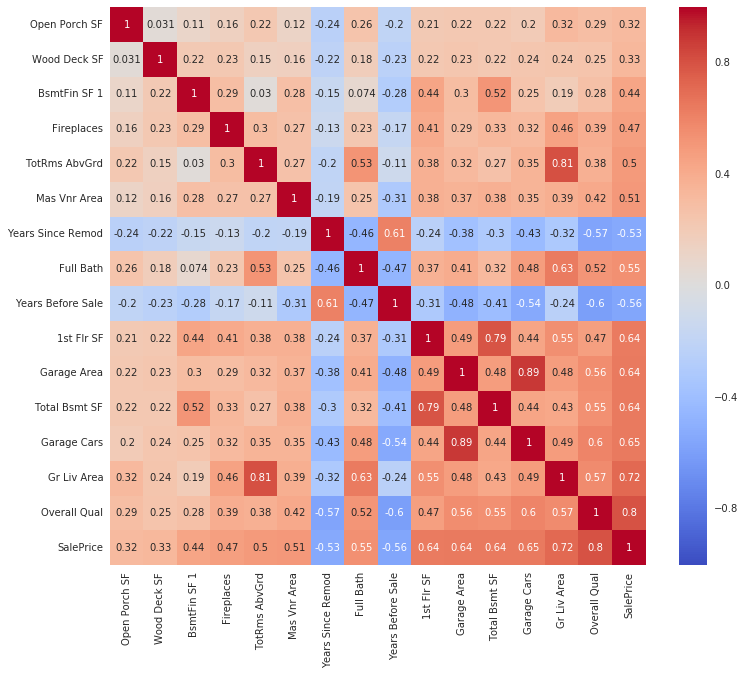

In [24]:
# make a correlation map with a correlation above 0.3
corrmat = numerical_data[strong_corrs.index].corr()

#draw the heatmap
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, annot = True, cmap= 'coolwarm')


 Based on the correlation matrix heatmap, I can tell that the following pairs of columns are strongly correlated:

- Gr Liv Area and TotRms AbvGrd
- Garage Area and Garage Cars


After reading the descriptions of these columns from the [data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), I can tell that each pair of columns reflects very similar information. Because 'Gr Liv Area' and 'Garage Area' are continuous variables that capture more nuance, let's drop the 'TotRms AbvGrd' and 'Garage Cars'.




In [25]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
print(numerical_data[final_corr_cols.index].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2929
Data columns (total 14 columns):
Open Porch SF        2927 non-null int64
Wood Deck SF         2927 non-null int64
BsmtFin SF 1         2927 non-null float64
Fireplaces           2927 non-null int64
Mas Vnr Area         2927 non-null float64
Years Since Remod    2927 non-null int64
Full Bath            2927 non-null int64
Years Before Sale    2927 non-null int64
1st Flr SF           2927 non-null int64
Garage Area          2927 non-null float64
Total Bsmt SF        2927 non-null float64
Gr Liv Area          2927 non-null int64
Overall Qual         2927 non-null int64
SalePrice            2927 non-null int64
dtypes: float64(4), int64(10)
memory usage: 343.0 KB
None


## Categorical data

In [26]:
#select only 'object' type of data
text_data = transform_data.select_dtypes(include=['object'])
text_data.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive'],
      dtype='object')

In [27]:
#check the unique values in categorical_data
text_data.describe()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Exter Qual,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive
count,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927,2927
unique,7,2,4,4,3,5,3,28,9,8,5,8,6,8,16,17,4,5,6,6,5,2,5,8,3
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Ex,Y,TA,Typ,Y
freq,2270,2915,1859,2632,2924,2138,2786,443,2520,2898,2422,1480,2320,2884,1025,1014,1799,2546,1307,2882,1492,2731,1494,2725,2649


In [28]:
#select columns which have more than 10 unique values

list_unique_drop = []
for col in text_data:
    if len(text_data[col].value_counts()) > 10:
        list_unique_drop.append(col)
        
list_unique_drop        

['Neighborhood', 'Exterior 1st', 'Exterior 2nd']

In [29]:
#drop columns which have more than 10 unique values

text_data = text_data.drop(list_unique_drop , axis=1)

text_data.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Style', 'Roof Matl', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Kitchen Qual',
       'Functional', 'Paved Drive'],
      dtype='object')

In [30]:
# convert remaining text columns to categorical

for col in text_data:
    transform_data[col] = transform_data[col].astype('category')


In [31]:
# Create dummy columns and add back to the dataframe!
transform_data = pd.concat([
    transform_data, 
    pd.get_dummies(transform_data.select_dtypes(include=['category']))
], axis=1).drop(text_data,axis=1)


In [32]:
# update the logic for the select_features() function
def select_features(data, coeff_corr=0.3, coeff_uniq=10):
    
    numerical_data = data.select_dtypes(include=['int', 'float'])
    #select just the SalePrice column from the resulting data frame, compute the absolute value of each term, 
    #sort the resulting Series by the correlation values
    sorted_corrs = numerical_data.corr()['SalePrice'].abs().sort_values()
 
    transform_data = data.drop(sorted_corrs[sorted_corrs < coeff_corr].index, axis=1)

    #select only 'object' type of data
    text_data = data.select_dtypes(include=['object'])

    #select columns which have more than 10 unique values
    list_unique_drop = []
    for col in text_data:
        if len(text_data[col].value_counts()) > coeff_uniq:
            list_unique_drop.append(col)
            
    #drop columns which have more than 10 unique values
    text_data = text_data.drop(list_unique_drop, axis=1)

    # convert remaining text columns to categorical
    for col in text_data:
        data[col] = data[col].astype('category')

    # Create dummy columns and add back to the dataframe!
    data = pd.concat([data, pd.get_dummies(data.select_dtypes(include=['category']))], axis=1).drop(text_data,axis=1)

    return data


data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse


56924.137909505065

## Train And Test

Let's add a parameter named k that controls the type of cross validation that occurs:
- when k = 0, perform holdout validation
- when k = 1, perform simple cross validation
- when k > 0, implement k-fold cross validation using k folds

In [33]:
def transform_features(data):
    #drop columns with more than 5% missing values
    train_null_counts = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]
    precentage_5 = len(data)*5/100
    missing_values_5 = train_null_counts[(train_null_counts > precentage_5)].sort_values()
    data = data.drop(missing_values_5.index, axis=1)

    #drop text columns with missing values
    text_cols_mv = data.select_dtypes(include=['object']).isnull().sum()
    drop_text_cols_mv = text_cols_mv[text_cols_mv > 0]
    data = data.drop(drop_text_cols_mv.index, axis=1)

    #fill null values of numerical columns with the most common value
    mode_values = data.mode().iloc[0]
    data = data.fillna(data.mode().iloc[0])

    #create new features
    data['Years Since Remod'] = data['Yr Sold'] - data['Year Remod/Add']  
    data['Years Before Sale'] = data['Yr Sold'] - data['Year Built'] 
    
    #drop negative values from new columns
    data = data.drop(index = [1702, 2180, 2181])
    
    #drop columns that leak information about the sale and have useless information
    columns_delete = ['Order', 'PID', 'Yr Sold', 'Mo Sold', 'Sale Condition', 'Sale Type', 'Year Built', 'Year Remod/Add']
    data = data.drop(columns_delete, axis=1)

    return data

def select_features(data, coeff_corr=0.3, coeff_uniq=10):
    
    numerical_data = data.select_dtypes(include=['int', 'float'])
    #select just the SalePrice column from the resulting data frame, compute the absolute value of each term, 
    #sort the resulting Series by the correlation values
    sorted_corrs = numerical_data.corr()['SalePrice'].abs().sort_values()
 
    transform_data = data.drop(sorted_corrs[sorted_corrs < coeff_corr].index, axis=1)

    #select only 'object' type of data
    text_data = data.select_dtypes(include=['object'])

    #select columns which have more than 10 unique values
    list_unique_drop = []
    for col in text_data:
        if len(text_data[col].value_counts()) > coeff_uniq:
            list_unique_drop.append(col)
            
    #drop columns which have more than 10 unique values
    text_data = text_data.drop(list_unique_drop, axis=1)

    # convert remaining text columns to categorical
    for col in text_data:
        data[col] = data[col].astype('category')

    # Create dummy columns and add back to the dataframe!
    data = pd.concat([data, pd.get_dummies(data.select_dtypes(include=['category']))], axis=1).drop(text_data,axis=1)

    return data

def train_and_test(data, k=0):
    lr = LinearRegression()
    features = data.select_dtypes(include=['integer', 'float']).columns.drop('SalePrice')
    
    if k == 0:
        train_test_index = round(len(data)/2)
        #select only numeric data
        train = data[:train_test_index].select_dtypes(include=['integer', 'float'])
        test = data[train_test_index:].select_dtypes(include=['integer', 'float'])
    
        lr.fit(train[features], train['SalePrice'])
        predictions = lr.predict(test[features])
    
        mse = mean_squared_error(test['SalePrice'], predictions)
        rmse = np.sqrt(mse)
        return rmse
    
    elif k == 1:
        data = data.sample(frac=1)
        fold_one = data[:1460]
        fold_two = data[1460:]
        
        lr.fit(fold_one[features], fold_one['SalePrice'])
        predictions1 = lr.predict(fold_two[features])
        mse1 = mean_squared_error(fold_two['SalePrice'], predictions1)
        rmse1 = mse1**(.5)
        
        lr.fit(fold_two[features], fold_two['SalePrice'])
        predictions2 = lr.predict(fold_one[features])
        mse2 = mean_squared_error(fold_one['SalePrice'], predictions2)
        rmse2 = mse2**(.5)

        avg_rmse = np.mean([rmse1, rmse2])
        return avg_rmse
        
    else:
        kf = KFold(k, shuffle=True, random_state=1)
        mses = cross_val_score(lr, data[features], data['SalePrice'], scoring='neg_mean_squared_error', cv=kf)
        predictions = cross_val_predict(lr, data[features], data['SalePrice'], cv = kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        std_rmse = np.std(rmses)
    
    return avg_rmse, std_rmse


data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse, std = train_and_test(filtered_data, k=4)

rmse, std 


(28554.460437975227, 4882.8530038909585)


## Conclusion

In this project we use some feature engineering and feature selection techniques to make and select the proper features for Linear Regression Model. 
